In [1]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [2]:
def get_data(filename):

    with open(filename) as training_file:
        csv_reader =csv.reader(training_file, delimiter=',')
        first_line = True
        temp_images = []
        temp_labels = []
        for row in csv_reader:
            if first_line:
                first_line = False
            else:
                temp_labels.append(row[0])
                images_data = row[1:785]
                images_data_as_array = np.array_split(images_data, 28)
                temp_images.append(images_data_as_array)
          
        images = np.array(temp_images).astype('float')
        labels = np.array(temp_labels).astype('float')
      
    return images, labels

path_sign_mnist_train = f"{getcwd()}/../tmp2/sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/../tmp2/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)


(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [3]:
training_images = np.expand_dims(training_images,axis=3)
testing_images = np.expand_dims(testing_images,axis=3)

train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

validation_datagen = ImageDataGenerator(
     rescale=1.0/255.0)
    
print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [17]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
]
)
# Compile Model. 
model.compile(optimizer='adam', loss ='sparse_categorical_crossentropy', metrics = ['acc'])
batch_size = 10
train_generator = train_datagen.flow(training_images, training_labels, batch_size)
validation_generator = validation_datagen.flow(testing_images,testing_labels,batch_size)
# # Train the Model
history = model.fit_generator(train_generator,
                              steps_per_epoch = len(training_images)/batch_size,
                              epochs = 2,
                              validation_data = validation_generator,
                              validation_steps = len(testing_images)/batch_size)

model.evaluate(testing_images, testing_labels, verbose=0)

Epoch 1/2
2746/2745 [==============================] - 125s 46ms/step - loss: 2.6516 - acc: 0.1687 - val_loss: 1.7895 - val_acc: 0.4374
Epoch 2/2
2746/2745 [==============================] - 128s 47ms/step - loss: 1.9363 - acc: 0.3738 - val_loss: 1.4656 - val_acc: 0.4771


[227.18957031045755, 0.27830452]

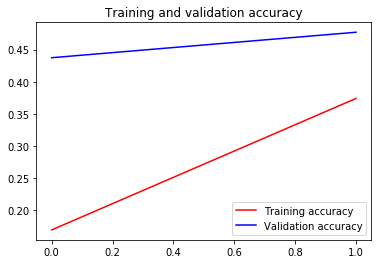

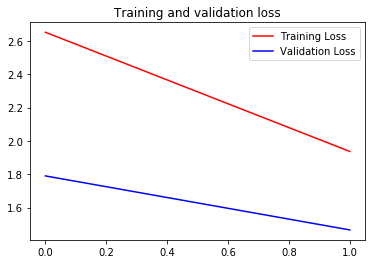

In [19]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()